In [1]:
import sys
sys.path.append("../")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mempred import *

ver()

Importing plotly failed. Interactive plots will not work.


This is mempred version 3.0
Latest feature: integrate Mitterwallner method


### Model System (Single Exponential Memory in a Double-Well Potential)

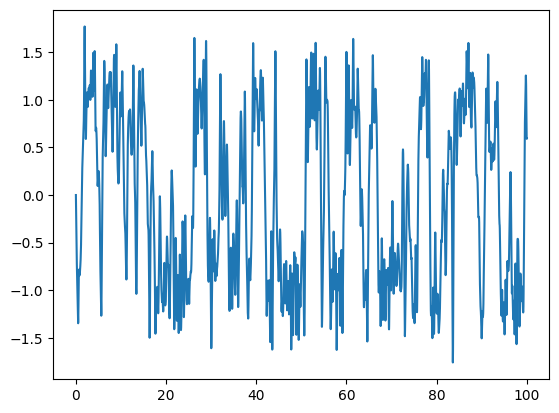

In [2]:
dt=0.01
x = np.load('example.npy')
t = np.arange(0,len(x)*dt,dt)

plt.plot(t[:10000],x[:10000])

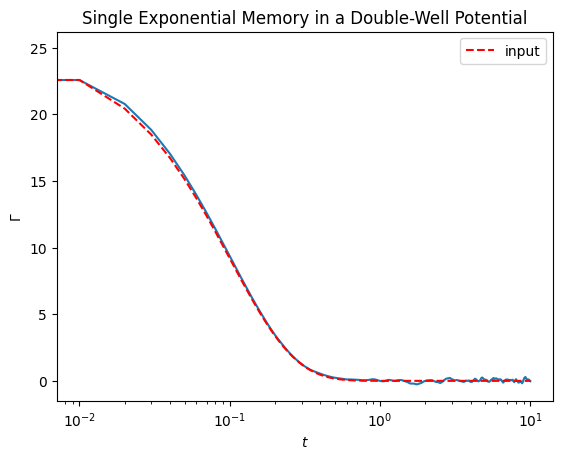

In [3]:
from numba import njit



predict=GLEPrediction(bins=200,  cut = len(x) ,trunc=1000, dt = 0.01,physical=True, no_fe=False, plot_pred = True,kde_mode=False)
kernel = predict.extractKernel([x],time=t,fit_kernel = False,kT=2.494,G_method=True,half_stepped=False)

plt.plot(kernel[1],kernel[2])
plt.plot(kernel[1],24.94*np.exp(-kernel[1]*10),'r--',label='input')
plt.legend()
plt.xscale('log')
plt.title("Single Exponential Memory in a Double-Well Potential")
plt.xscale("log")
plt.xlabel("$t$")
plt.ylabel("$\\Gamma$")
plt.show()

### Weather Berlin

In [4]:
data = pd.read_csv('berlin.csv')
data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-02-10,5,-1,0.0,4.9,1,1,89,07:42 PM,08:42 AM,...,-2,26,87,91,1.1,991,5,9,162,16
1,2009-02-11,3,0,0.2,4.9,1,1,82,09:07 PM,08:56 AM,...,-5,36,99,92,1.1,1001,3,8,298,23
2,2009-02-12,0,-3,0.0,4.9,1,1,74,10:29 PM,09:09 AM,...,-6,24,89,89,0.0,1012,0,10,293,15
3,2009-02-13,1,-4,0.0,9.9,2,2,67,11:49 PM,09:22 AM,...,-5,14,21,88,0.0,1016,1,9,266,10
4,2009-02-14,0,-5,0.2,6.6,1,1,59,No moonrise,09:36 AM,...,-7,20,65,93,0.2,1021,0,6,317,13


<AxesSubplot:>

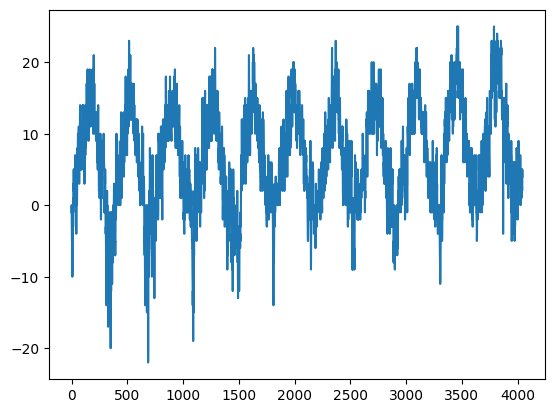

In [5]:

data['mintempC'].plot()



plotting extracted memory kernel...


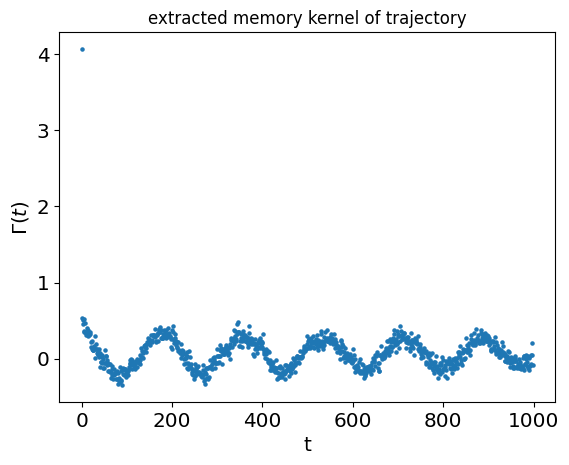

plotting running integral of kernel...


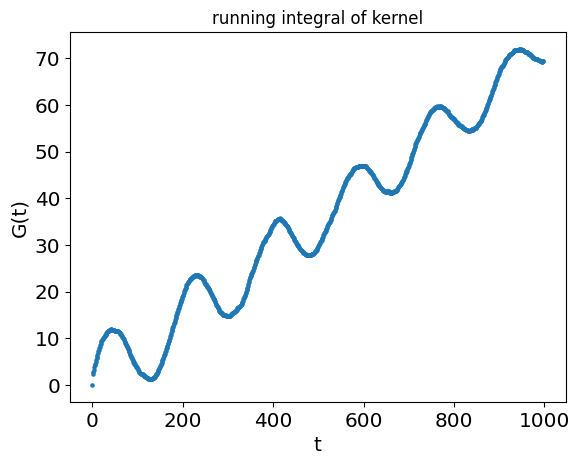

In [6]:
predict=GLEPrediction(bins=100,  cut = len(data) ,trunc=1000, dt = 1,physical=True, no_fe=False, plot_pred = True,kde_mode=True)
kernel = predict.extractKernel([data['mintempC'].values],fit_kernel = False,kT=2.494,G_method=False,plot_kernel=True)


### Weather Berlin (With Filtering and Mitterwallner Method)

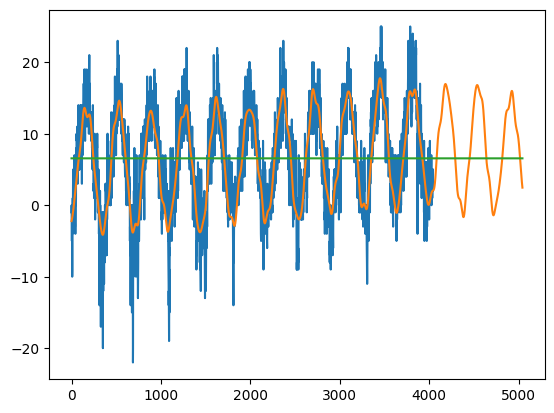

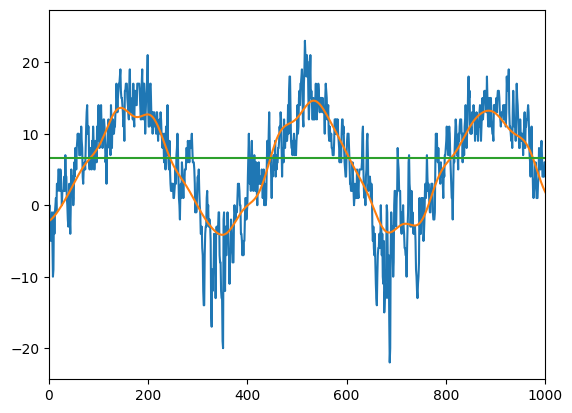

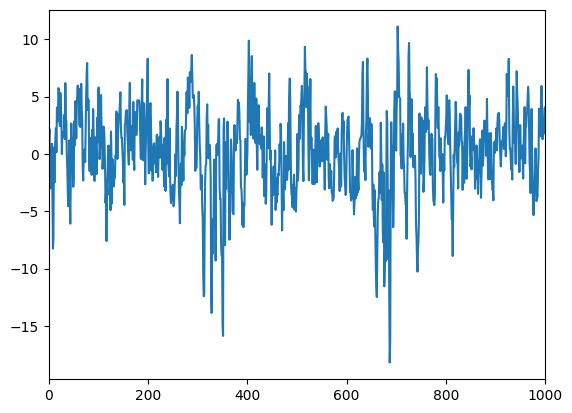

In [7]:
t= data.index.values
x = data['mintempC'].values.astype(float)
n_steps = 1000 #extrapolate into future
cut = int(len(x))

#mph = 0.01
#N=20
#deg_polyfit = 0#1 #trend captured by long sine fit, and not linear fit 
#param,x_res, x_trend = extrapolate_fourier_analysis_trend(t,x,cut,n_steps,find_peaks=False,mph=mph,N=1,verbose=False,fit=True)
#param,x_seas, x_noise,_ = extrapolate_fourier_analysis(t,x_res,cut,n_steps,deg_polyfit,mph,N,verbose=True,fit=True,lp_trend=False)
#x_seas+=x_trend

detrend = True
fit_trend_part = True
N_trend=1
deseasonalize = True
N_seas=5
fit_seas_part = False

x_noise,x_seas,x_trend = filter_and_extrapolate_time_series(t,x,cut,n_steps,verbose=False,detrend=detrend,fit_trend_part=fit_trend_part,
                                                               N_trend=N_trend,deseasonalize=deseasonalize,N_seas=N_seas,fit_seas_part=fit_seas_part)


t_noise = np.arange(len(x_noise))
plt.plot(data['mintempC'])
plt.plot(x_seas)
plt.plot(x_trend)
plt.show()

plt.plot(data['mintempC'])
plt.plot(x_seas)
plt.plot(x_trend)
plt.xlim(0,1000)
plt.show()

plt.plot(x_noise)
plt.xlim(0,1000)
plt.show()
plt.show()



dt = 1.0


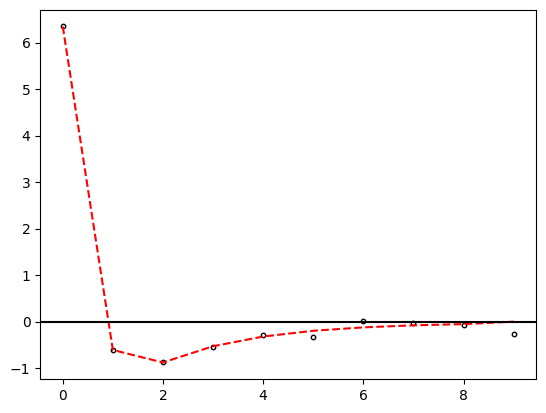

plotting extracted memory kernel...


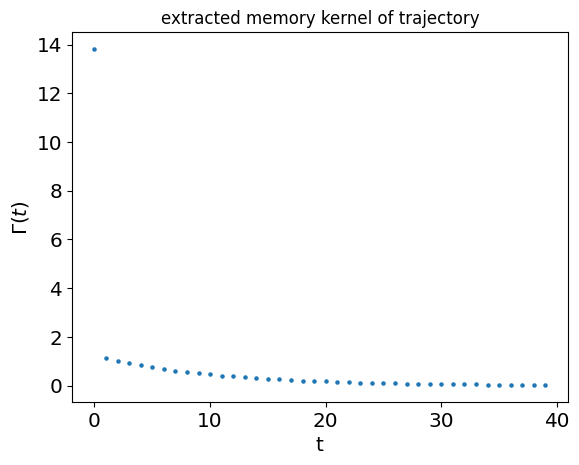

plotting running integral of kernel...


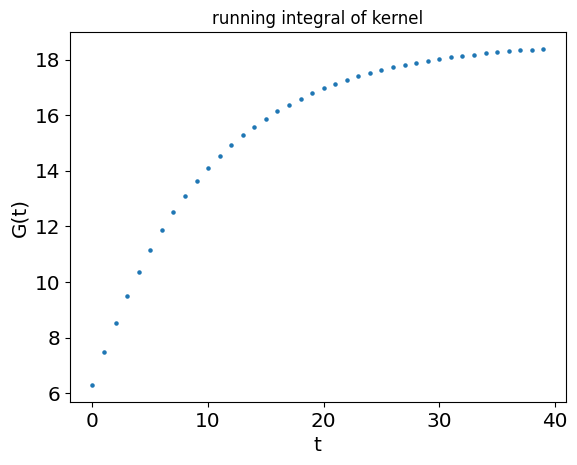

In [8]:
p0=[0.21,  1.82, 5.88,0.23, 9.276517012388659]
bounds = [[-10,0,0,0,0],[10,10,10,10,100]]

predict=GLEPrediction(bins=100,  cut = cut ,trunc=40, dt = 1, no_fe=False, plot_pred = False,kde_mode=True,mori=True,disc=0,hs_pred=False)
kernel = predict.extractKernel_estimator([x_noise], plot_kernel =True,p0=p0,bounds=bounds,end=10,verbose=True)
